##Импорт сторонних библиотек

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import pickle

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


##Загрузка данных

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/task/evalution/df_out.csv')
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [ ]:
df.shape

(10000, 20)

##Data Preparation

###Data cleaning

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   

In [ ]:
df_clean

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002.0,toyota,rav4,gas,150000,clean,automatic,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,42.123900,-79.189500,2021-04-10T16:33:57-0400,low,2021-04-10 20:33:57+00:00
9996,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008.0,jeep,wrangler,gas,113573,clean,other,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,43.216990,-77.755610,2021-05-03T09:36:30-0400,medium,2021-05-03 13:36:30+00:00
9997,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011.0,audi,a3 2.0t premium plus pzev,gas,150184,clean,automatic,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,-122.982753,2021-04-22T12:14:01-0700,low,2021-04-22 19:14:01+00:00
9998,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015.0,porsche,cayenne,hybrid,61943,clean,automatic,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,-89.397796,2021-04-14T09:14:42-0500,high,2021-04-14 14:14:42+00:00


In [ ]:
df_clean.isna().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year               36
manufacturer        0
model             128
fuel               63
odometer            0
title_status      166
transmission       45
image_url           2
description         2
state               0
lat                98
long               98
posting_date        2
price_category      0
date                2
dtype: int64

In [ ]:
df_clean.value_counts("fuel")

fuel
gas         8402
other        730
diesel       653
hybrid       108
electric      44
dtype: int64

In [ ]:
##df_clean.fuel = df_clean.fuel.fillna("other")

In [ ]:
df_clean.value_counts("title_status")

title_status
clean         9518
rebuilt        171
salvage         92
lien            35
missing         16
parts only       2
dtype: int64

In [ ]:
#df_clean.title_status = df_clean.title_status.fillna("clean")

In [ ]:
df_clean.value_counts("transmission")

transmission
automatic    7700
other        1624
manual        631
dtype: int64

In [ ]:
df_clean.isna().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year               36
manufacturer        0
model             128
fuel               63
odometer            0
title_status      166
transmission       45
image_url           2
description         2
state               0
lat                98
long               98
posting_date        2
price_category      0
date                2
dtype: int64

In [ ]:
df_clean = df_clean.loc[df_clean['year'].notna()]
df_clean = df_clean.loc[df_clean['fuel'].notna()]
df_clean = df_clean.loc[df_clean['transmission'].notna()]
df_clean = df_clean.loc[df_clean['lat'].notna()]
df_clean = df_clean.loc[df_clean['long'].notna()]
df_clean = df_clean.loc[df_clean['title_status'].notna()]


df_clean.shape

(9632, 20)

In [ ]:
df_clean.model = df_clean.model.fillna("other")

In [ ]:
df_clean.isna().sum()

id                0
url               0
region            0
region_url        0
price             0
year              0
manufacturer      0
model             0
fuel              0
odometer          0
title_status      0
transmission      0
image_url         0
description       0
state             0
lat               0
long              0
posting_date      0
price_category    0
date              0
dtype: int64

In [ ]:
df_clean

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012.0,bmw,1 series 128i coupe 2d,other,80465,clean,other,https://images.craigslist.org/00F0F_5UAXmOzC18...,Carvana is the safer way to buy a car During t...,tn,35.970000,-83.940000,2021-04-08T15:10:56-0400,medium,2021-04-08 19:10:56+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002.0,toyota,rav4,gas,150000,clean,automatic,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,42.123900,-79.189500,2021-04-10T16:33:57-0400,low,2021-04-10 20:33:57+00:00
9996,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008.0,jeep,wrangler,gas,113573,clean,other,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,43.216990,-77.755610,2021-05-03T09:36:30-0400,medium,2021-05-03 13:36:30+00:00
9997,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011.0,audi,a3 2.0t premium plus pzev,gas,150184,clean,automatic,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,-122.982753,2021-04-22T12:14:01-0700,low,2021-04-22 19:14:01+00:00
9998,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015.0,porsche,cayenne,hybrid,61943,clean,automatic,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,-89.397796,2021-04-14T09:14:42-0500,high,2021-04-14 14:14:42+00:00


###Data transformation

In [ ]:
df_clean['year'].describe()

count    9632.000000
mean     2010.877803
std         9.778585
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

In [ ]:
df_clean["year"] = df_clean["year"].astype(int)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9632 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9632 non-null   int64  
 1   url             9632 non-null   object 
 2   region          9632 non-null   object 
 3   region_url      9632 non-null   object 
 4   price           9632 non-null   int64  
 5   year            9632 non-null   int64  
 6   manufacturer    9632 non-null   object 
 7   model           9632 non-null   object 
 8   fuel            9632 non-null   object 
 9   odometer        9632 non-null   int64  
 10  title_status    9632 non-null   object 
 11  transmission    9632 non-null   object 
 12  image_url       9632 non-null   object 
 13  description     9632 non-null   object 
 14  state           9632 non-null   object 
 15  lat             9632 non-null   float64
 16  long            9632 non-null   float64
 17  posting_date    9632 non-null   o

In [ ]:
obj_name = ["manufacturer", "fuel", "title_status", "transmission", "price_category"]

for name in obj_name:
  df_clean[name] = df_clean[name].astype("category")
  df_clean[name +'_code'] = df_clean[name].cat.codes
  df_clean = df_clean.drop([name], axis=1)


In [ ]:
df_clean

,id,url,region,region_url,price,year,model,odometer,image_url,description,state,lat,long,posting_date,date,manufacturer_code,fuel_code,title_status_code,transmission_code,price_category_code
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,2500 crew cab big horn,27442,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,2021-04-17 16:30:50+00:00,32,0,0,2,0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,golf r hatchback,14048,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,2021-04-28 10:52:20+00:00,38,2,0,2,0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,rav4,117291,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,2021-04-17 14:08:57+00:00,37,2,0,0,2
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,altima,8000,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,2021-05-03 22:32:06+00:00,28,2,0,0,2
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,1 series 128i coupe 2d,80465,https://images.craigslist.org/00F0F_5UAXmOzC18...,Carvana is the safer way to buy a car During t...,tn,35.970000,-83.940000,2021-04-08T15:10:56-0400,2021-04-08 19:10:56+00:00,3,4,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002,rav4,150000,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,42.123900,-79.189500,2021-04-10T16:33:57-0400,2021-04-10 20:33:57+00:00,37,2,0,0,1
9996,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008,wrangler,113573,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,43.216990,-77.755610,2021-05-03T09:36:30-0400,2021-05-03 13:36:30+00:00,19,2,0,2,2
9997,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011,a3 2.0t premium plus pzev,150184,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,-122.982753,2021-04-22T12:14:01-0700,2021-04-22 19:14:01+00:00,2,2,0,0,1
9998,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015,cayenne,61943,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,-89.397796,2021-04-14T09:14:42-0500,2021-04-14 14:14:42+00:00,31,3,0,0,0


###Removing outliers

In [ ]:
df_clean.describe()

,id,price,year,odometer,lat,long,manufacturer_code,fuel_code,title_status_code,transmission_code,price_category_code
count,9.632000e+03,9.632000e+03,9632.000000,9632.000000,9632.000000,9632.000000,9632.000000,9632.000000,9632.000000,9632.000000,9632.000000
mean,7.311559e+09,2.070913e+04,2010.877803,93522.666528,38.601829,-94.068484,17.801495,2.025021,0.124585,0.398463,0.972384
std,4.369283e+06,1.269450e+05,9.778585,63374.965243,5.837594,18.067191,11.256390,0.757544,0.715500,0.757662,0.821061
min,7.301586e+09,5.000000e+02,1915.000000,0.000000,-67.144243,-158.069300,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.308189e+09,7.800000e+03,2008.000000,39140.500000,34.853300,-108.572700,8.000000,2.000000,0.000000,0.000000,0.000000
50%,7.312784e+09,1.588750e+04,2013.000000,89000.000000,39.295050,-87.993800,15.000000,2.000000,0.000000,0.000000,1.000000
75%,7.315291e+09,2.799000e+04,2017.000000,137171.250000,42.434350,-80.789575,28.000000,2.000000,0.000000,0.000000,2.000000
max,7.317090e+09,1.234568e+07,2022.000000,283466.000000,64.947500,173.885502,39.000000,4.000000,5.000000,2.000000,2.000000


In [ ]:
def show_boplot(df, plt_name, i):
  fig, axs = plt.subplots()

  axs.boxplot(df[plt_name[i]])
  axs.set_title(f"Граффик о распределении выбросов {plt_name[i]} автомобиля")
  axs.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

  plt.show()

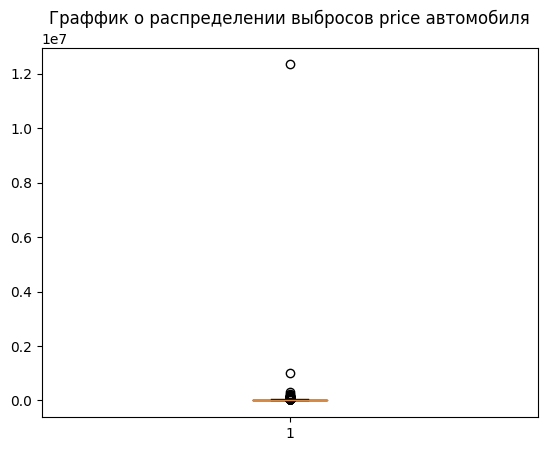

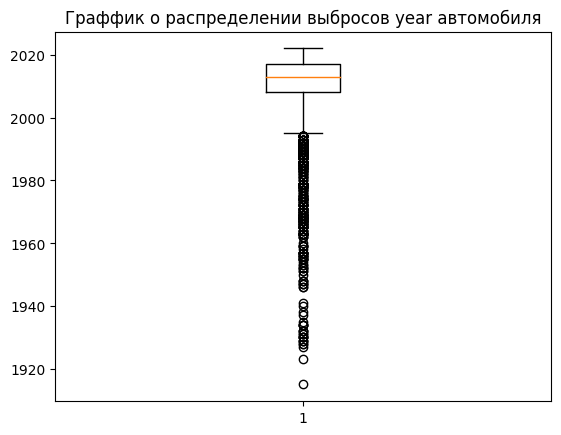

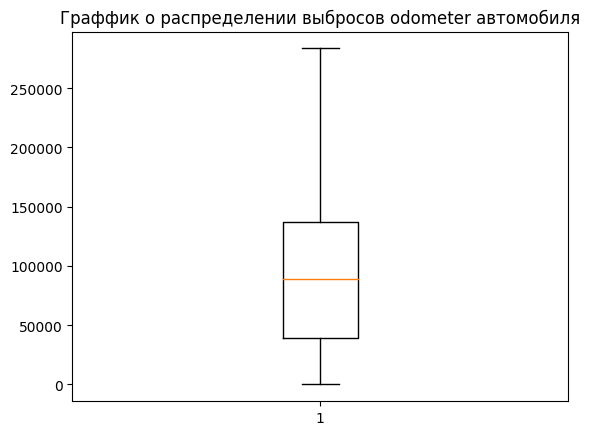

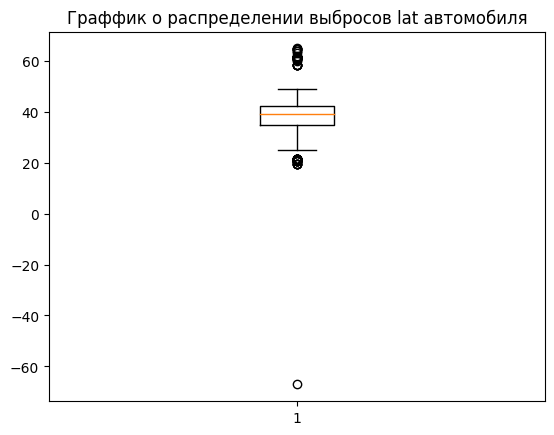

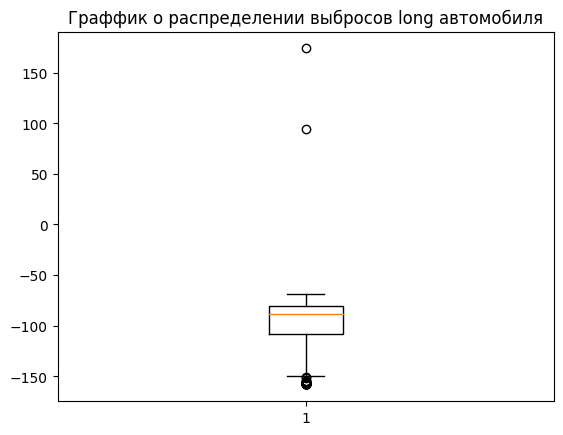

In [ ]:
plt_name = ["price", "year", "odometer", "lat", "long"]

for i in range(len(plt_name)) :
  show_boplot(df_clean, plt_name, i)

In [ ]:
plt_name.remove("odometer")

plt_name

['price', 'year', 'lat', 'long']

In [ ]:
def calculate_price(df, plt_name, i):
   q25 = df[plt_name[i]].quantile(0.25)
   q75 = df[plt_name[i]].quantile(0.75)
   iqr = q75 - q25
   boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
   return boundaries

In [ ]:
quant_list = []

for i in range(len(plt_name)) :
  quant_list.append(calculate_price(df_clean, plt_name, i))
quant_list

[(-22485.0, 58275.0),
 (1994.5, 2030.5),
 (23.48172499999999, 53.80592500000001),
 (-150.24738749999997, -39.11488750000004)]

In [ ]:
for i in range(len(plt_name)):
  is_outlier = (df_clean[plt_name[i]] < quant_list[i][0]) | (df_clean[plt_name[i]] > quant_list[i][1])
  print(f"Кличество выбросов для {plt_name[i]}: {is_outlier.sum()}")

Кличество выбросов для price: 199
Кличество выбросов для year: 391
Кличество выбросов для lat: 135
Кличество выбросов для long: 52


In [ ]:
df_is_outlier = df_clean.loc[(df_clean['price'] > quant_list[0][1]) | (df_clean['price'] < quant_list[0][0])]
df_is_outlier.shape

(199, 20)

In [ ]:
df_is_outlier

,id,url,region,region_url,price,year,model,odometer,image_url,description,state,lat,long,posting_date,date,manufacturer_code,fuel_code,title_status_code,transmission_code,price_category_code
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1970,oldsmobile 442,111111,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.098400,-89.273400,2021-04-25T10:10:43-0500,2021-04-25 15:10:43+00:00,29,2,0,0,0
33,7304521734,https://kpr.craigslist.org/ctd/d/pasco-2019-fo...,kennewick-pasco-richland,https://kpr.craigslist.org,79999,2019,f450 deisel power stroke,41759,https://images.craigslist.org/00D0D_ctOGGthFxQ...,2019 Ford F450 Lariat FX4 Dually 4x4 **Clean C...,wa,46.234838,-119.128015,2021-04-09T19:46:04-0700,2021-04-10 02:46:04+00:00,12,0,0,0,0
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,69888,1948,coe,1,https://images.craigslist.org/00M0M_8jgBCZZuG6...,Awesome Resto-Mod COE Ford Car Hauler. Equippe...,ca,33.680100,-117.908500,2021-04-29T10:49:29-0700,2021-04-29 17:49:29+00:00,12,2,0,0,0
96,7311450619,https://wenatchee.craigslist.org/ctd/d/kittita...,wenatchee,https://wenatchee.craigslist.org,58995,2020,wrangler,17799,https://images.craigslist.org/00a0a_chVstv8e4Z...,ＷＩＮＤＹ ＣＨＥＶＲＯＬＥＴ ⭐ No Payments For 90 Days* ⭐...,wa,46.999600,-120.516300,2021-04-23T10:43:27-0700,2021-04-23 17:43:27+00:00,19,2,0,0,0
144,7305640478,https://siouxfalls.craigslist.org/ctd/d/gilber...,sioux falls / SE SD,https://siouxfalls.craigslist.org,59900,2014,f550 xl,156000,https://images.craigslist.org/00x0x_httQ0BwNkq...,**FOR SALE** 2014 Ford F550 Super Duty 45' Al...,sd,42.117274,-88.436783,2021-04-12T10:34:12-0500,2021-04-12 15:34:12+00:00,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017,other,47000,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,2021-05-03 21:37:36+00:00,33,2,0,0,0
9955,7315493686,https://palmsprings.craigslist.org/ctd/d/fonta...,palm springs,https://palmsprings.craigslist.org,68995,2016,2500,61130,https://images.craigslist.org/00p0p_5PdfAkd0AM...,2016 Ram 2500 Laramie Offered by: R&B Auto...,ca,34.107220,-117.455310,2021-05-01T13:40:57-0700,2021-05-01 20:40:57+00:00,32,0,0,0,0
9971,7314385254,https://spokane.craigslist.org/ctd/d/puyallup-...,spokane / coeur d'alene,https://spokane.craigslist.org,86977,2017,f450 super duty crew cab,16806,https://images.craigslist.org/00H0H_5P0NdUIgHi...,2017 *** Ford F450 Super Duty Crew Cab Platinu...,id,47.197304,-122.291776,2021-04-29T10:03:19-0700,2021-04-29 17:03:19+00:00,12,0,0,0,0
9978,7307184389,https://holland.craigslist.org/ctd/d/otsego-20...,holland,https://holland.craigslist.org,61022,2020,sierra 1500,5894,https://images.craigslist.org/00i0i_64FIhCkyTb...,"2020 GMC Sierra 1500 AT4 -- $61,022 ☎ Call ...",mi,42.448987,-85.661948,2021-04-15T11:05:47-0400,2021-04-15 15:05:47+00:00,13,2,0,0,0


In [ ]:
df_clean = df_clean.drop(df_clean[(df_clean['price'] > quant_list[0][1]) | (df_clean['price'] < quant_list[0][0])].index)
df_clean.shape

(9433, 20)

In [ ]:
df_is_outlier = df_clean.loc[(df_clean['year'] > quant_list[1][1]) | (df_clean['year'] < quant_list[1][0])]
df_is_outlier.shape

(383, 20)

In [ ]:
df_clean = df_clean.drop(df_clean[(df_clean['year'] > quant_list[1][1]) | (df_clean['year'] < quant_list[1][0])].index)
df_clean.shape

(9050, 20)

In [ ]:
df_is_outlier = df_clean.loc[(df_clean['lat'] > quant_list[2][1]) | (df_clean['lat'] < quant_list[2][0])]
df_is_outlier.shape

(124, 20)

In [ ]:
df_clean = df_clean.drop(df_clean[(df_clean['lat'] > quant_list[2][1]) | (df_clean['lat'] < quant_list[2][0])].index)
df_clean.shape

(8926, 20)

In [ ]:
df_is_outlier = df_clean.loc[(df_clean['long'] > quant_list[3][1]) | (df_clean['long'] < quant_list[3][0])]
df_is_outlier.shape

(1, 20)

In [ ]:
df_clean = df_clean.drop(df_clean[(df_clean['long'] > quant_list[3][1]) | (df_clean['long'] < quant_list[3][0])].index)
df_clean.shape

(8925, 20)

In [ ]:
for i in range(len(plt_name)):
  is_outlier = (df_clean[plt_name[i]] < quant_list[i][0]) | (df_clean[plt_name[i]] > quant_list[i][1])
  print(f"Кличество выбросов для {plt_name[i]}: {is_outlier.sum()}")

Кличество выбросов для price: 0
Кличество выбросов для year: 0
Кличество выбросов для lat: 0
Кличество выбросов для long: 0


In [ ]:
def swap_emissions(df, col_name, quant_list, i):
  is_outlier_min = (df[col_name] < quant_list[i][0])
  is_outlier_max = (df[col_name] >  quant_list[i][1])

  df.loc[is_outlier_min, col_name] = quant_list[i][0] + 0.5
  df.loc[is_outlier_max, col_name] = quant_list[i][1] - 0.5

  return df

In [ ]:
#df_clean = swap_emissions(df_clean, "year", quant_list, 1)
#df_clean = swap_emissions(df_clean, "lat", quant_list, 2)
#df_clean = swap_emissions(df_clean, "long", quant_list, 3)

In [ ]:
for i in range(len(plt_name)):
  is_outlier = (df_clean[plt_name[i]] < quant_list[i][0]) | (df_clean[plt_name[i]] > quant_list[i][1])
  print(f"Кличество выбросов для {plt_name[i]}: {is_outlier.sum()}")

Кличество выбросов для price: 0
Кличество выбросов для year: 0
Кличество выбросов для lat: 0
Кличество выбросов для long: 0


In [ ]:
df_clean

,id,url,region,region_url,price,year,model,odometer,image_url,description,state,lat,long,posting_date,date,manufacturer_code,fuel_code,title_status_code,transmission_code,price_category_code
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,2500 crew cab big horn,27442,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,2021-04-17 16:30:50+00:00,32,0,0,2,0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,golf r hatchback,14048,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,2021-04-28 10:52:20+00:00,38,2,0,2,0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,rav4,117291,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,2021-04-17 14:08:57+00:00,37,2,0,0,2
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,altima,8000,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,2021-05-03 22:32:06+00:00,28,2,0,0,2
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,1 series 128i coupe 2d,80465,https://images.craigslist.org/00F0F_5UAXmOzC18...,Carvana is the safer way to buy a car During t...,tn,35.970000,-83.940000,2021-04-08T15:10:56-0400,2021-04-08 19:10:56+00:00,3,4,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002,rav4,150000,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,42.123900,-79.189500,2021-04-10T16:33:57-0400,2021-04-10 20:33:57+00:00,37,2,0,0,1
9996,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008,wrangler,113573,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,43.216990,-77.755610,2021-05-03T09:36:30-0400,2021-05-03 13:36:30+00:00,19,2,0,2,2
9997,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011,a3 2.0t premium plus pzev,150184,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,-122.982753,2021-04-22T12:14:01-0700,2021-04-22 19:14:01+00:00,2,2,0,0,1
9998,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015,cayenne,61943,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,-89.397796,2021-04-14T09:14:42-0500,2021-04-14 14:14:42+00:00,31,3,0,0,0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8925 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   8925 non-null   int64  
 1   url                  8925 non-null   object 
 2   region               8925 non-null   object 
 3   region_url           8925 non-null   object 
 4   price                8925 non-null   int64  
 5   year                 8925 non-null   int64  
 6   model                8925 non-null   object 
 7   odometer             8925 non-null   int64  
 8   image_url            8925 non-null   object 
 9   description          8925 non-null   object 
 10  state                8925 non-null   object 
 11  lat                  8925 non-null   float64
 12  long                 8925 non-null   float64
 13  posting_date         8925 non-null   object 
 14  date                 8925 non-null   object 
 15  manufacturer_code    8925 non-null   i

##Feature engineering

In [ ]:
df_prepared = df_clean.copy()

In [ ]:
df_prepared

,id,url,region,region_url,price,year,model,odometer,image_url,description,state,lat,long,posting_date,date,manufacturer_code,fuel_code,title_status_code,transmission_code,price_category_code
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,2500 crew cab big horn,27442,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,2021-04-17 16:30:50+00:00,32,0,0,2,0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,golf r hatchback,14048,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,2021-04-28 10:52:20+00:00,38,2,0,2,0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,rav4,117291,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,2021-04-17 14:08:57+00:00,37,2,0,0,2
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,altima,8000,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,2021-05-03 22:32:06+00:00,28,2,0,0,2
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,1 series 128i coupe 2d,80465,https://images.craigslist.org/00F0F_5UAXmOzC18...,Carvana is the safer way to buy a car During t...,tn,35.970000,-83.940000,2021-04-08T15:10:56-0400,2021-04-08 19:10:56+00:00,3,4,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002,rav4,150000,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,42.123900,-79.189500,2021-04-10T16:33:57-0400,2021-04-10 20:33:57+00:00,37,2,0,0,1
9996,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008,wrangler,113573,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,43.216990,-77.755610,2021-05-03T09:36:30-0400,2021-05-03 13:36:30+00:00,19,2,0,2,2
9997,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011,a3 2.0t premium plus pzev,150184,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,-122.982753,2021-04-22T12:14:01-0700,2021-04-22 19:14:01+00:00,2,2,0,0,1
9998,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015,cayenne,61943,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,-89.397796,2021-04-14T09:14:42-0500,2021-04-14 14:14:42+00:00,31,3,0,0,0


In [ ]:
len(df_prepared.manufacturer_code.unique())

39

In [ ]:
df_for_onehot = df_prepared[["region", "region_url", "model", "state"]].copy()

In [ ]:
df_for_onehot

,region,region_url,model,state
0,chattanooga,https://chattanooga.craigslist.org,2500 crew cab big horn,tn
2,reno / tahoe,https://reno.craigslist.org,golf r hatchback,ca
3,fayetteville,https://fayetteville.craigslist.org,rav4,nc
4,new york city,https://newyork.craigslist.org,altima,ny
5,knoxville,https://knoxville.craigslist.org,1 series 128i coupe 2d,tn
...,...,...,...,...
9995,chautauqua,https://chautauqua.craigslist.org,rav4,ny
9996,binghamton,https://binghamton.craigslist.org,wrangler,ny
9997,salem,https://salem.craigslist.org,a3 2.0t premium plus pzev,or
9998,madison,https://madison.craigslist.org,cayenne,wi


In [ ]:
onehot = OneHotEncoder(sparse=False)

In [ ]:
onehot.fit(df_for_onehot)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [ ]:
df_onehot = onehot.transform(df_for_onehot)
df_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df_onehot.shape

(8925, 3837)

In [ ]:
std_scaler = StandardScaler()

In [ ]:
col_name = ["price", "year", "odometer", "lat", "long", "manufacturer_code", "fuel_code", "title_status_code", "transmission_code", "price_category_code"]
df_scaler = df_prepared[col_name].copy()

std_scaler.fit(df_scaler[col_name])

StandardScaler()

In [ ]:
std_scaler_df_prepared = std_scaler.transform(df_scaler)

In [ ]:
for i in range(len(col_name)-1):
  df_scaler[col_name[i] + "_std"] = std_scaler_df_prepared[:,i]
  df_scaler = df_scaler.drop([col_name[i]], axis = 1)

In [ ]:
df_scaler

,price_category_code,price_std,year_std,odometer_std,lat_std,long_std,manufacturer_code_std,fuel_code_std,title_status_code_std,transmission_code_std
0,0,2.906569,1.391316,-1.085111,-0.657379,0.470107,1.252241,-2.741656,-0.17533,2.068027
2,0,1.369537,0.851706,-1.297818,-0.904743,0.521388,1.783967,-0.052429,-0.17533,2.068027
3,2,-0.301390,0.132227,0.341762,-0.530691,0.873574,1.695346,-0.052429,-0.17533,-0.525179
4,2,0.276978,1.571186,-1.393865,0.423171,1.182267,0.897757,-0.052429,-0.17533,-0.525179
5,2,-0.294259,-0.047643,-0.243064,-0.481626,0.550253,-1.317766,2.636799,-0.17533,2.068027
...,...,...,...,...,...,...,...,...,...,...
9995,1,-1.094070,-1.846341,0.861207,0.706905,0.840892,1.695346,-0.052429,-0.17533,-0.525179
9996,2,-0.301786,-0.767122,0.282717,0.918019,0.928618,0.100169,-0.052429,-0.17533,2.068027
9997,1,-0.737542,-0.227513,0.864129,1.248070,-1.838404,-1.406387,-0.052429,-0.17533,-0.525179
9998,0,1.077185,0.491967,-0.537208,0.881819,0.216342,1.163620,1.292185,-0.17533,-0.525179


In [ ]:
df_prepared_end = df_scaler.copy()
df_prepared_end[onehot.get_feature_names_out()] = df_onehot

In [ ]:
df_prepared_end

,price_category_code,price_std,year_std,odometer_std,lat_std,long_std,manufacturer_code_std,fuel_code_std,title_status_code_std,transmission_code_std,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0,2.906569,1.391316,-1.085111,-0.657379,0.470107,1.252241,-2.741656,-0.17533,2.068027,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.369537,0.851706,-1.297818,-0.904743,0.521388,1.783967,-0.052429,-0.17533,2.068027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,-0.301390,0.132227,0.341762,-0.530691,0.873574,1.695346,-0.052429,-0.17533,-0.525179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.276978,1.571186,-1.393865,0.423171,1.182267,0.897757,-0.052429,-0.17533,-0.525179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,-0.294259,-0.047643,-0.243064,-0.481626,0.550253,-1.317766,2.636799,-0.17533,2.068027,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,-1.094070,-1.846341,0.861207,0.706905,0.840892,1.695346,-0.052429,-0.17533,-0.525179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,2,-0.301786,-0.767122,0.282717,0.918019,0.928618,0.100169,-0.052429,-0.17533,2.068027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,1,-0.737542,-0.227513,0.864129,1.248070,-1.838404,-1.406387,-0.052429,-0.17533,-0.525179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0,1.077185,0.491967,-0.537208,0.881819,0.216342,1.163620,1.292185,-0.17533,-0.525179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_prepared_end.to_csv("/content/drive/MyDrive/task/28_evalution/df_prepared.csv", sep='\t')

##Modeling

In [ ]:
df_prepared_end

,price_category_code,price_std,year_std,odometer_std,lat_std,long_std,manufacturer_code_std,fuel_code_std,title_status_code_std,transmission_code_std,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0,2.906569,1.391316,-1.085111,-0.657379,0.470107,1.252241,-2.741656,-0.17533,2.068027,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.369537,0.851706,-1.297818,-0.904743,0.521388,1.783967,-0.052429,-0.17533,2.068027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,-0.301390,0.132227,0.341762,-0.530691,0.873574,1.695346,-0.052429,-0.17533,-0.525179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.276978,1.571186,-1.393865,0.423171,1.182267,0.897757,-0.052429,-0.17533,-0.525179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,-0.294259,-0.047643,-0.243064,-0.481626,0.550253,-1.317766,2.636799,-0.17533,2.068027,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,-1.094070,-1.846341,0.861207,0.706905,0.840892,1.695346,-0.052429,-0.17533,-0.525179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,2,-0.301786,-0.767122,0.282717,0.918019,0.928618,0.100169,-0.052429,-0.17533,2.068027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,1,-0.737542,-0.227513,0.864129,1.248070,-1.838404,-1.406387,-0.052429,-0.17533,-0.525179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0,1.077185,0.491967,-0.537208,0.881819,0.216342,1.163620,1.292185,-0.17533,-0.525179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_modeling = df_prepared_end.copy()
df_modeling = df_modeling.drop(['price_std'], axis=1)

x = df_modeling.drop(['price_category_code'], axis=1)
y = df_modeling['price_category_code']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state = 42
)

In [ ]:
logr = LogisticRegression(C=2.0, max_iter = 1000)
logr.fit(x_train, y_train)

predicted_train_logr = logr.predict(x_train)
predicted_test_logr = logr.predict(x_test)

print("Train accuracy: {0}".format(accuracy_score(y_train, predicted_train_logr)))
print("Test accuracy: {0}".format(accuracy_score(y_test, predicted_test_logr)))

Train accuracy: 0.907795741956139
Test accuracy: 0.7445855115758029


In [ ]:
def out_confusiom_matrix(y_predict_test, y_test):
  cm = confusion_matrix(y_pred = y_predict_test , y_true = y_test)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()

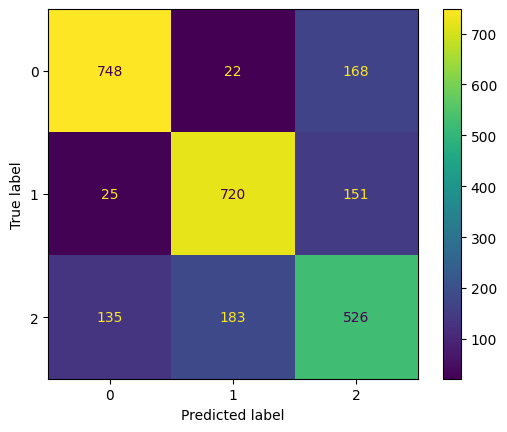

In [ ]:
out_confusiom_matrix(predicted_test_logr, y_test)

In [ ]:
col_none_koef = []

for col, i in zip(x.columns, logr.coef_[0]):
   if i == 0:
    col_none_koef.append(col)
print(f"Название колонок с нулевым коеффициентом :{col_none_koef}")

Название колонок с нулевым коеффициентом :['region_bloomington', 'region_del rio / eagle pass', 'region_houma', 'region_mattoon-charleston', 'region_northeast SD', 'region_southeast missouri', 'region_southwest MS', 'region_url_https://bloomington.craigslist.org', 'region_url_https://delrio.craigslist.org', 'region_url_https://houma.craigslist.org', 'region_url_https://mattoon.craigslist.org', 'region_url_https://natchez.craigslist.org', 'region_url_https://nesd.craigslist.org', 'region_url_https://semo.craigslist.org', 'model_-benz e350', 'model_124 spider classica', 'model_135i', 'model_1500 big horn', 'model_1500 big horn/lone star', 'model_1500 classic slt', 'model_1500 classic warlock', 'model_1500 harvest', 'model_1500 laramie', 'model_1500 laramie 4x4 gas', 'model_1500 quad cab 4x4', 'model_1500 quad cab laramie pickup', 'model_1500 slt 4wd 4x4', 'model_2 series 230i xdrive coupe', 'model_2002 f 450', 'model_2007 TRANSCRAFT EAGLE SD TRAILER', 'model_2012', 'model_2500 crew cab b

In [ ]:
x2 = x.drop(columns= col_none_koef)

x_train2, x_test2, y_train2, y_test2 = train_test_split(
    x2, y, test_size=0.3, random_state = 42
)


In [ ]:
logr2 = LogisticRegression(C=2.0, max_iter = 800, solver = "sag", multi_class = "multinomial")
logr2.fit(x_train2, y_train2)

predicted_train_logr2 = logr2.predict(x_train2)
predicted_test_logr2 = logr2.predict(x_test2)

print("Train accuracy: {0}".format(accuracy_score(y_train2, predicted_train_logr2)))
print("Test accuracy: {0}".format(accuracy_score(y_test2, predicted_test_logr2)))

Train accuracy: 0.907795741956139
Test accuracy: 0.7445855115758029


In [ ]:
rf = RandomForestClassifier(n_estimators = 100)  #  min_samples_leaf=1, n_estimators=500 criterion = "entropy"
rf.fit(x_train2, y_train2)

predicted_train_rf = rf.predict(x_train2)
predicted_test_rf = rf.predict(x_test2)

print("Train accuracy: {0}".format(accuracy_score(y_train2, predicted_train_rf)))
print("Test accuracy: {0}".format(accuracy_score(y_test2, predicted_test_rf)))

Train accuracy: 1.0
Test accuracy: 0.7419716206123973


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = 128, batch_size = 64, max_iter = 230)  # activation = "logistic"  , learning_rate = "adaptive"
mlp.fit(x_train2, y_train2)

predicted_train_mlp = mlp.predict(x_train2)
predicted_test_mlp = mlp.predict(x_test2)

print("Train accuracy: {0}".format(accuracy_score(y_train2, predicted_train_mlp)))
print("Test accuracy: {0}".format(accuracy_score(y_test2, predicted_test_mlp)))

Train accuracy: 0.9996798463262366
Test accuracy: 0.7531740104555639


In [ ]:
logr = LogisticRegression(C=2.0, max_iter = 800, solver = "sag", multi_class = "multinomial")
logr_score = cross_val_score(logr, x_train2, y_train2, cv=5)

logr_score.mean(), logr_score.std()

(0.7065793434747798, 0.012363223829389121)

In [ ]:
rf = RandomForestClassifier(n_estimators = 100)
rf_score = cross_val_score(rf, x_train2, y_train2, cv=5)

rf_score.mean(), rf_score.std()

(0.7056158847077663, 0.010196632077556833)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = 128, batch_size = 64, max_iter = 230)
mlp_score = cross_val_score(mlp, x_train2, y_train2, cv=5)

mlp_score.mean(), mlp_score.std()

(0.725786773418735, 0.012919146039127308)

##Result

In [ ]:
mlp.fit(x_test2, y_test2)

MLPClassifier(batch_size=64, hidden_layer_sizes=128, max_iter=230)

In [ ]:
filename = "/content/drive/MyDrive/task/evalution/model.pickle"

with open(filename, "wb") as file:
  pickle.dump(mlp, file)